# **DELHIVERY FEATURE ENGINEERING CASE STUDY**

## Problem Statement:

# Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021.The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.The company wants to understand and process the data coming out of data engineering pipelines:
#• Clean, sanitize and manipulate data to get useful features out of raw fields
#• Make sense out of the raw data and help the data science team to build forecasting models on it

In [1]:
#importing necessary libraries of python.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import ttest_ind,chi2_contingency,kruskal,levene,kstest
from scipy.stats import pearsonr,spearmanr
import statsmodels.api as sm
from statsmodels.formula.api import ols
import random

In [2]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181
To: /content/delhivery_data.csv?1642751181
100% 55.6M/55.6M [00:00<00:00, 186MB/s]


In [3]:
#Reading csv file
df=pd.read_csv('delhivery_data.csv?1642751181')

In [4]:
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630


In [5]:
# Gives total number of rows and columns
df.shape

(144867, 24)

There are 144867 rows and 24 columns

# Basic Data Cleaning and Exploration :

In [6]:
#This gives info of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [7]:
df.data.value_counts()

,count
data,
training,104858
test,40009


In [8]:
df.route_type.value_counts()

,count
route_type,
FTL,99660
Carting,45207


In [9]:
df.source_name.value_counts()

,count
source_name,
Gurgaon_Bilaspur_HB (Haryana),23347
Bangalore_Nelmngla_H (Karnataka),9975
Bhiwandi_Mankoli_HB (Maharashtra),9088
Pune_Tathawde_H (Maharashtra),4061
Hyderabad_Shamshbd_H (Telangana),3340
...,...
Allahabad_Mirapati_L (Uttar Pradesh),1
Hajipur_ThaneDPP_D (Bihar),1
Kothanalloor_Majoor_D (Kerala),1


In [10]:
df.destination_name.value_counts()

,count
destination_name,
Gurgaon_Bilaspur_HB (Haryana),15192
Bangalore_Nelmngla_H (Karnataka),11019
Bhiwandi_Mankoli_HB (Maharashtra),5492
Hyderabad_Shamshbd_H (Telangana),5142
Kolkata_Dankuni_HB (West Bengal),4892
...,...
North Delhi (Delhi),1
Chennai_Mylapore (Tamil Nadu),1
Ranaghat_ArickDPP_D (West Bengal),1


In [11]:
df.is_cutoff.value_counts()

,count
is_cutoff,
True,118749
False,26118


In [12]:
df.cutoff_factor.value_counts()

,count
cutoff_factor,
22,13157
9,12378
44,8334
18,8263
66,5795
...,...
625,1
509,1
192,1


In [13]:
#Count NaN values per column
df.isna().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


In [14]:
# Convert data , route_type to categorical format since it has 2 categories
categorical_cols = ['data', 'route_type']
df[categorical_cols] = df[categorical_cols].astype('category')

df.dtypes

,0
data,category
trip_creation_time,object
route_schedule_uuid,object
route_type,category
trip_uuid,object
source_center,object
source_name,object
destination_center,object
destination_name,object
od_start_time,object


In [15]:
# Convert some object column to timestamp since it contains time related data
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'], errors='coerce')
df['od_start_time'] = pd.to_datetime(df['od_start_time'], errors='coerce')
df['od_end_time'] = pd.to_datetime(df['od_end_time'], errors='coerce')

In [16]:
# Fill source_name with Null values with unknown value
df['source_name'].fillna('unknown', inplace=True)

In [17]:
# fill destination_name with unknown for null values
df['destination_name'].fillna('unknown', inplace=True)

In [18]:
df.dtypes

,0
data,category
trip_creation_time,datetime64[ns]
route_schedule_uuid,object
route_type,category
trip_uuid,object
source_center,object
source_name,object
destination_center,object
destination_name,object
od_start_time,datetime64[ns]


In [19]:
df.isna().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,0
destination_center,0
destination_name,0
od_start_time,0


Hence no null values now.


In [20]:
# Statistical Summary of numerical data
df.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867,144867,144867,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,2018-09-22 13:34:23.659819264,2018-09-22 18:02:45.855230720,2018-09-23 10:04:31.395393024,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,2018-09-17 03:20:51.775845888,2018-09-17 08:05:40.886155008,2018-09-18 01:48:06.410121984,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,2018-09-22 04:24:27.932764928,2018-09-22 08:53:00.116656128,2018-09-23 03:13:03.520212992,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,2018-09-27 17:57:56.350054912,2018-09-27 22:41:50.285857024,2018-09-28 12:49:06.054018048,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000
std,NaN,NaN,NaN,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530


In [21]:
df['segment_key'] = df['trip_uuid'].astype(str) + df['source_center'].astype(str) + df['destination_center'].astype(str)
segment_cols = ['segment_actual_time', 'segment_osrm_distance',  'segment_osrm_time']
for col in segment_cols:
  df[col+ '_sum']= df.groupby('segment_key')[col].cumsum()
df[[col+ '_sum' for col in segment_cols]]

,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,14.0,11.9653,11.0
1,24.0,21.7243,20.0
2,40.0,32.5395,27.0
3,61.0,45.5619,39.0
4,67.0,49.4772,44.0
...,...,...,...
144862,92.0,65.3487,94.0
144863,118.0,82.7212,115.0
144864,138.0,103.4265,149.0
144865,155.0,122.3150,176.0


In [22]:
# aggregating at sub-journey level
create_segment_dict= {
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',

    'destination_name' : 'last',
    'destination_center' : 'last',

    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',

    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',

    'osrm_time' : 'last',
    'osrm_distance' : 'last',

    'segment_actual_time_sum' : 'last',
    'segment_osrm_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',
}

In [23]:
# Group by mini-trips, sorting by time
segment =df.groupby('segment_key').agg(create_segment_dict).reset_index()
segment =segment.sort_values(by=['trip_uuid', 'od_start_time'], ascending=True).reset_index()
segment

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_name,...,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),...,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
1,0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),...,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
2,3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),...,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
3,2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),...,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
4,5,trip-153671043369099517IND562132AAAIND000000ACB,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),...,2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,3099.0,1689.964663,2736.0,1528.0,2072.8556,2700.0,1710.0,2227.5270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,26363,trip-153861115439069069IND628204AAAIND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),...,2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431
26364,26362,trip-153861115439069069IND627657AAAIND628613AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),Peikulam_SriVnktpm_D (Tamil Nadu),...,2018-10-04 03:31:11.183797,2018-10-04 04:16:39.894872,45.0,17.373209,33.0,31.0,25.7087,32.0,30.0,25.7087
26365,26364,trip-153861115439069069IND628613AAAIND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),...,2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869
26366,26367,trip-153861118270144424IND583201AAAIND583119AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583201AAA,Hospet (Karnataka),Sandur_WrdN1DPP_D (Karnataka),...,2018-10-04 02:51:44.712656,2018-10-04 03:58:40.726547,66.0,25.534793,42.0,26.0,28.0484,41.0,25.0,28.0484


In [24]:
segment[segment['trip_uuid'] == 'trip-153741093647649320']

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_name,...,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
10374,10374,trip-153741093647649320IND388121AAAIND388620AAB,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),...,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,67.0,44.0,49.4772
10375,10375,trip-153741093647649320IND388620AABIND388320AAA,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),Anand_Vaghasi_IP (Gujarat),...,2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,43.595802,102.0,45.0,53.2334,100.0,44.0,53.2334


In [25]:
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26368 entries, 0 to 26367
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   index                           26368 non-null  int64         
 1   segment_key                     26368 non-null  object        
 2   data                            26368 non-null  category      
 3   trip_creation_time              26368 non-null  datetime64[ns]
 4   route_schedule_uuid             26368 non-null  object        
 5   route_type                      26368 non-null  category      
 6   trip_uuid                       26368 non-null  object        
 7   source_center                   26368 non-null  object        
 8   source_name                     26368 non-null  object        
 9   destination_name                26368 non-null  object        
 10  destination_center              26368 non-null  object        
 11  od

Calculate time taken between od_start_time and od_end_time and keep it as a feature :

In [26]:
segment['od_time_diff_hour']= (segment['od_end_time'] - segment['od_start_time']).dt.total_seconds() / (60)
segment['od_time_diff_hour']

,od_time_diff_hour
0,999.505379
1,1260.604421
2,122.779486
3,58.832388
4,3099.723591
...,...
26363,62.115193
26364,45.478518
26365,91.087797
26366,66.933565


In [27]:
segment

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_name,...,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff_hour
0,1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),...,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,999.505379
1,0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),...,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,1260.604421
2,3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),...,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,122.779486
3,2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),...,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,58.832388
4,5,trip-153671043369099517IND562132AAAIND000000ACB,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),...,2018-09-14 03:40:17.106733,3099.0,1689.964663,2736.0,1528.0,2072.8556,2700.0,1710.0,2227.5270,3099.723591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26363,26363,trip-153861115439069069IND628204AAAIND627657AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),...,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431,62.115193
26364,26362,trip-153861115439069069IND627657AAAIND628613AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627657AAA,Thisayanvilai_UdnkdiRD_D (Tamil Nadu),Peikulam_SriVnktpm_D (Tamil Nadu),...,2018-10-04 04:16:39.894872,45.0,17.373209,33.0,31.0,25.7087,32.0,30.0,25.7087,45.478518
26365,26364,trip-153861115439069069IND628613AAAIND627005AAA,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),...,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869,91.087797
26366,26367,trip-153861118270144424IND583201AAAIND583119AAA,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583201AAA,Hospet (Karnataka),Sandur_WrdN1DPP_D (Karnataka),...,2018-10-04 03:58:40.726547,66.0,25.534793,42.0,26.0,28.0484,41.0,25.0,28.0484,66.933565


In [28]:
create_trip_dict= {
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',

    'destination_name' : 'last',
    'destination_center' : 'last',

    'start_scan_to_end_scan' : 'sum',
    'od_time_diff_hour' : 'sum',

    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',

    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',

    'segment_actual_time_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
}

In [29]:
trip= segment.groupby('trip_uuid').agg(create_trip_dict).reset_index(drop= True)
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_name,destination_center,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),IND562101AAA,180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),IND401104AAA,100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka),IND583101AAA,717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,257.0,258.028928,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551
14813,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),IND121004AAA,60.0,60.590521,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883
14814,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,421.0,422.119867,38.684839,282.0,48.0,58.9037,281.0,88.0,104.8866
14815,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND627005AAA,347.0,348.512862,134.723836,264.0,179.0,171.1103,258.0,221.0,223.5324


In [30]:
trip[['actual_time','segment_actual_time_sum']]

,actual_time,segment_actual_time_sum
0,1562.0,1548.0
1,143.0,141.0
2,3347.0,3308.0
3,59.0,59.0
4,341.0,340.0
...,...,...
14812,83.0,82.0
14813,21.0,21.0
14814,282.0,281.0
14815,264.0,258.0


In [31]:
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_name,destination_center,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),IND562101AAA,180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),IND401104AAA,100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),Bellary_Dc (Karnataka),IND583101AAA,717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14812,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,257.0,258.028928,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551
14813,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),IND121004AAA,60.0,60.590521,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883
14814,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,421.0,422.119867,38.684839,282.0,48.0,58.9037,281.0,88.0,104.8866
14815,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND627005AAA,347.0,348.512862,134.723836,264.0,179.0,171.1103,258.0,221.0,223.5324


In [32]:
trip[trip['trip_uuid'] == 'trip-153741093647649320']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_name,destination_center,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
5919,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),Anand_Vaghasi_IP (Gujarat),IND388320AAA,195.0,195.386819,82.981842,170.0,89.0,107.4515,167.0,88.0,102.7106


In [33]:
trip[['actual_distance_to_destination','osrm_distance']]

,actual_distance_to_destination,osrm_distance
0,824.732854,991.3523
1,73.186911,85.1110
2,1927.404273,2354.0665
3,17.175274,19.6800
4,127.448500,146.7918
...,...,...
14812,57.762332,73.4630
14813,15.513784,16.0882
14814,38.684839,58.9037
14815,134.723836,171.1103


In [34]:
trip['destination_name'] = trip['destination_name'].str.lower() # lowering all columns
trip['source_name'] = trip['source_name'].str.lower()

In [35]:
def place2state(x):
    # transform "gurgaon_bilaspur_hb (haryana)" into "haryana"
    if '(' in x and ')' in x:
        state = x.split('(')[1]
        return state[:-1]  # remove trailing ')'
    return 'unknown'  # fallback if no state info

def place2city(x):
    # remove state part
    city = x.split(' (')[0]
    city = city.split('_')[0]

    # edge cases
    if city == 'pnq vadgaon sheri dpc':
        return 'vadgaonsheri'
    if city in ['pnq pashan dpc','pnq rahatani dpc','pune balaji nagar']:
        return 'pune'
    if city == 'hbr layout pc': return 'bengaluru'
    if city == 'bhopal mp nagar': return 'bhopal'
    if city == 'mumbai antop hill': return 'mumbai'
    return city

def place2city_place(x):
    x = x.split(' (')[0]
    parts = x.split('_')
    len_ = len(parts)

    if len_ >= 3:
        return parts[1]
    if len_ == 2:
        return parts[0]
    return x.split(' ')[0]

def place2code(x):
    x = x.split(' (')[0]
    parts = x.split('_')
    if len(parts) >= 3:
        return parts[-1]
    return 'none'

In [36]:
trip['destination_state'] = trip['destination_name'].apply( lambda x: place2state(x))
trip['destination_city'] = trip['destination_name'].apply( lambda x: place2city(x))
trip['destination_place'] = trip['destination_name'].apply( lambda x: place2city_place(x))
trip['destination_code'] = trip['destination_name'].apply( lambda x: place2code(x))

In [37]:
trip[['destination_state', 'destination_city', 'destination_place', 'destination_code']]

,destination_state,destination_city,destination_place,destination_code
0,haryana,gurgaon,bilaspur,hb
1,karnataka,chikblapur,shntisgr,d
2,punjab,chandigarh,mehmdpur,h
3,maharashtra,mumbai,mirard,ip
4,karnataka,bellary,bellary,none
...,...,...,...,...
14812,punjab,chandigarh,mehmdpur,h
14813,haryana,faridabad,blbgarh,dc
14814,uttar pradesh,kanpur,central,6
14815,tamil nadu,tirunelveli,vdkkusrt,i


# Insights Generation- Busiest route,popular route, emerging route

In [38]:
trip['trip_creation_time'] = pd.to_datetime(trip['trip_creation_time'])
trip['trip_year'] = trip['trip_creation_time'].dt.year
trip['trip_month'] = trip['trip_creation_time'].dt.month
trip['trip_hour'] = trip['trip_creation_time'].dt.hour
trip['trip_day'] = trip['trip_creation_time'].dt.day
trip['trip_week'] = trip['trip_creation_time'].dt.isocalendar().week
trip['trip_dayofweek'] = trip['trip_creation_time'].dt.dayofweek

In [39]:
trip[['trip_year','trip_month','trip_hour','trip_day','trip_week','trip_dayofweek']]

,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,2018,9,0,12,37,2
1,2018,9,0,12,37,2
2,2018,9,0,12,37,2
3,2018,9,0,12,37,2
4,2018,9,0,12,37,2
...,...,...,...,...,...,...
14812,2018,10,23,3,40,2
14813,2018,10,23,3,40,2
14814,2018,10,23,3,40,2
14815,2018,10,23,3,40,2


In [40]:
# Insights - busiest month,day,week

In [41]:
trip.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_name,destination_center,start_scan_to_end_scan,...,destination_state,destination_city,destination_place,destination_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,bhopal_trnsport_h (madhya pradesh),gurgaon_bilaspur_hb (haryana),IND000000ACB,2259.0,...,haryana,gurgaon,bilaspur,hb,2018,9,0,12,37,2
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,tumkur_veersagr_i (karnataka),chikblapur_shntisgr_d (karnataka),IND562101AAA,180.0,...,karnataka,chikblapur,shntisgr,d,2018,9,0,12,37,2
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,bangalore_nelmngla_h (karnataka),chandigarh_mehmdpur_h (punjab),IND160002AAC,3933.0,...,punjab,chandigarh,mehmdpur,h,2018,9,0,12,37,2
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),mumbai_mirard_ip (maharashtra),IND401104AAA,100.0,...,maharashtra,mumbai,mirard,ip,2018,9,0,12,37,2
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),bellary_dc (karnataka),IND583101AAA,717.0,...,karnataka,bellary,bellary,none,2018,9,0,12,37,2


In [42]:
num_cols =['start_scan_to_end_scan','actual_distance_to_destination','actual_time','osrm_time','osrm_distance','segment_actual_time_sum','segment_osrm_time_sum','segment_osrm_distance_sum','od_time_diff_hour']

# Find outliers in numerical variable and visualising it

<Axes: >

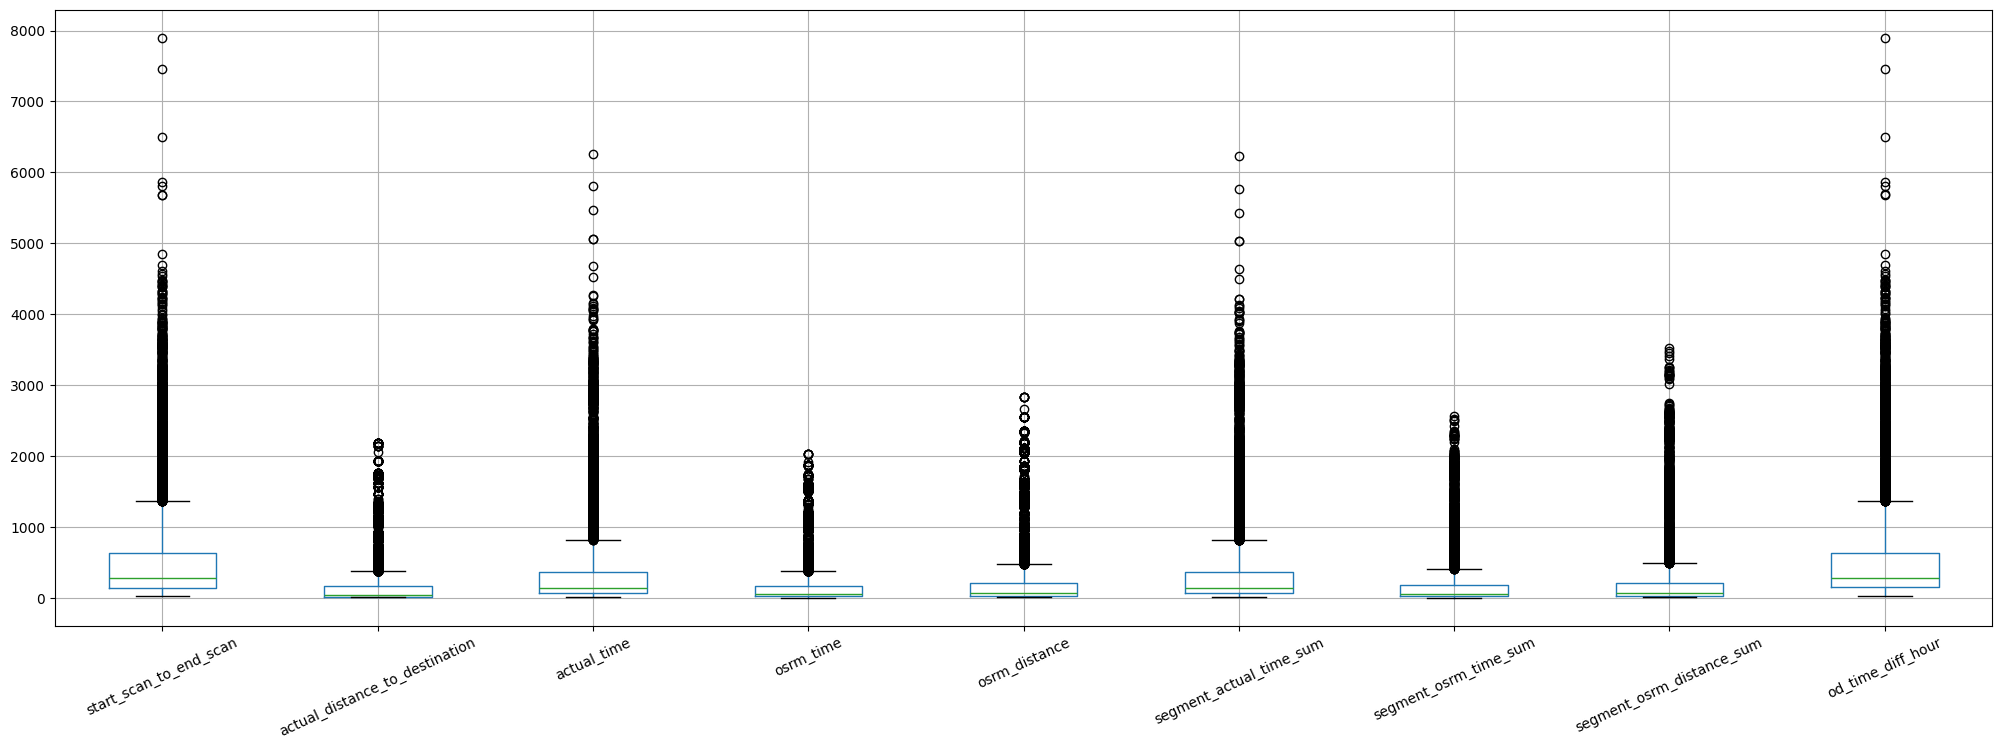

In [43]:
trip[num_cols].boxplot(rot=25,figsize=(25,8))

# Handle outliers using IQR METHOD

In [44]:
Q1 = trip[num_cols].quantile(0.25)
Q3 = trip[num_cols].quantile(0.75)
IQR = Q3 - Q1

In [45]:
trip = trip[~((trip[num_cols] < (Q1 - 1.5 * IQR)) |(trip[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
trip = trip.reset_index(drop= True)

In [46]:
trip

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_name,destination_center,start_scan_to_end_scan,...,destination_state,destination_city,destination_place,destination_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,tumkur_veersagr_i (karnataka),chikblapur_shntisgr_d (karnataka),IND562101AAA,180.0,...,karnataka,chikblapur,shntisgr,d,2018,9,0,12,37,2
1,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),mumbai_mirard_ip (maharashtra),IND401104AAA,100.0,...,maharashtra,mumbai,mirard,ip,2018,9,0,12,37,2
2,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),bellary_dc (karnataka),IND583101AAA,717.0,...,karnataka,bellary,bellary,none,2018,9,0,12,37,2
3,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,trip-153671055416136166,IND600116AAB,chennai_porur_dpc (tamil nadu),chennai_sriperumbudur_dc (tamil nadu),IND602105AAB,189.0,...,tamil nadu,chennai,sriperumbudur,dc,2018,9,0,12,37,2
4,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,trip-153671066201138152,IND600044AAD,chennai_chrompet_dpc (tamil nadu),chennai_vandalur_dc (tamil nadu),IND600048AAA,98.0,...,tamil nadu,chennai,vandalur,dc,2018,9,0,12,37,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12754,test,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,chandigarh_mehmdpur_h (punjab),chandigarh_mehmdpur_h (punjab),IND160002AAC,257.0,...,punjab,chandigarh,mehmdpur,h,2018,10,23,3,40,2
12755,test,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,fbd_balabhgarh_dpc (haryana),faridabad_blbgarh_dc (haryana),IND121004AAA,60.0,...,haryana,faridabad,blbgarh,dc,2018,10,23,3,40,2
12756,test,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND209304AAA,kanpur_central_h_6 (uttar pradesh),kanpur_central_h_6 (uttar pradesh),IND209304AAA,421.0,...,uttar pradesh,kanpur,central,6,2018,10,23,3,40,2
12757,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,tirunelveli_vdkkusrt_i (tamil nadu),tirunelveli_vdkkusrt_i (tamil nadu),IND627005AAA,347.0,...,tamil nadu,tirunelveli,vdkkusrt,i,2018,10,23,3,40,2


<Axes: >

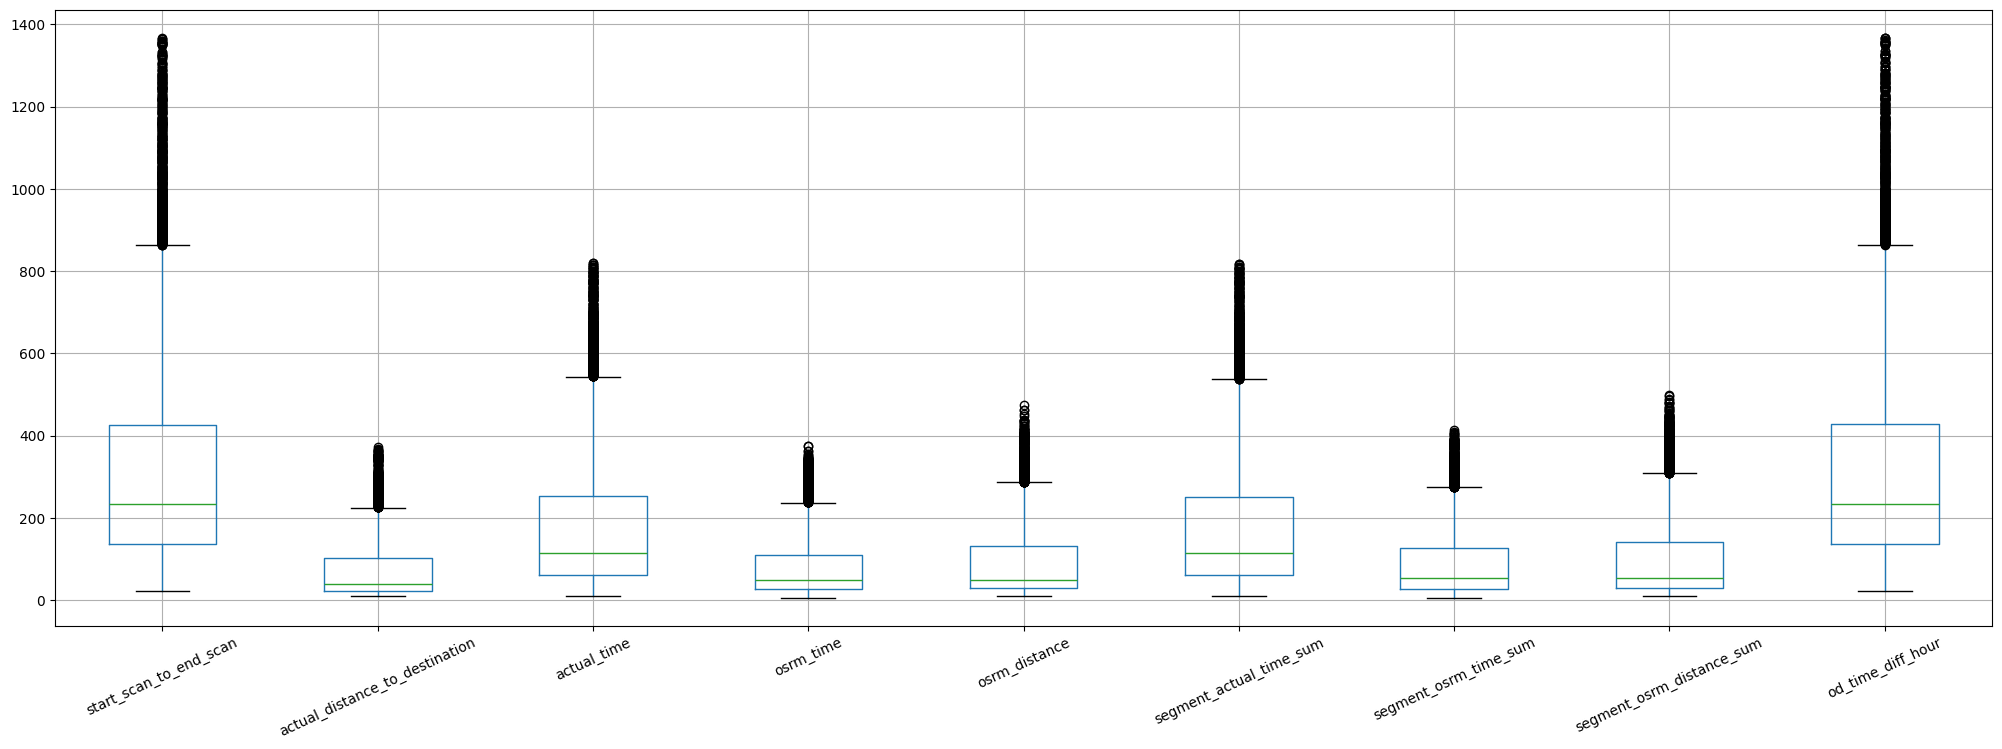

In [47]:
trip[num_cols].boxplot(rot=25,figsize=(25,8))

# Handling Categorical Variables

Only two route_type - Do one Hot encoding

In [48]:
trip['route_type'].value_counts()

,count
route_type,
Carting,8817
FTL,3942


In [49]:
trip['route_type']= trip['route_type'].map({'FTL':0,'Carting':1})

Normalize/ Standardize the numerical features using MinMaxScaler or Standard Scaler

In [50]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [51]:
scaler = StandardScaler()
scaler.fit_transform(trip[num_cols])

array([[-0.55178143,  0.00497635, -0.22350809, ..., -0.26822576,
        -0.15164476, -0.5481052 ],
       [-0.86258896, -0.76687991, -0.75153585, ..., -0.87952987,
        -0.82523179, -0.8628466 ],
       [ 1.53451416,  0.75271646,  1.02112879, ...,  0.35555394,
         0.50402925,  1.53448587],
       ...,
       [ 0.38452628, -0.470472  ,  0.65025214, ...,  0.0187129 ,
         0.06512959,  0.3850886 ],
       [ 0.09702931,  0.85297266,  0.53710334, ...,  1.67796691,
         1.30777913,  0.09948645],
       [ 0.12033987, -0.09293778,  0.60624983, ..., -0.24327457,
        -0.18946182,  0.12235848]])

In [52]:
trip[num_cols]= scaler.transform(trip[num_cols])
trip[num_cols]

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff_hour
0,-0.551781,0.004976,-0.223508,-0.150681,-0.080602,-0.227130,-0.268226,-0.151645,-0.548105
1,-0.862589,-0.766880,-0.751536,-0.878175,-0.806104,-0.746018,-0.879530,-0.825232,-0.862847
2,1.534514,0.752716,1.021129,0.521909,0.603318,1.032122,0.355554,0.504029,1.534486
3,-0.516816,-0.664606,-0.738964,-0.768365,-0.713134,-0.739690,-0.792201,-0.739473,-0.513666
4,-0.870359,-0.878152,-0.971547,-0.905628,-0.891056,-0.967495,-0.916957,-0.907535,-0.872505
...,...,...,...,...,...,...,...,...,...
12754,-0.252629,-0.207579,-0.600671,-0.233038,-0.209756,-0.600476,-0.305653,-0.354145,-0.251600
12755,-1.017993,-0.789776,-0.990406,-0.919354,-0.845930,-0.986478,-0.941908,-0.864909,-1.017680
12756,0.384526,-0.470472,0.650252,-0.425207,-0.371190,0.658775,0.018713,0.065130,0.385089
12757,0.097029,0.852973,0.537103,1.372940,0.872963,0.513234,1.677967,1.307779,0.099486


In [53]:
trip[num_cols].describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum,od_time_diff_hour
count,1.275900e+04,1.275900e+04,1.275900e+04,1.275900e+04,1.275900e+04,1.275900e+04,1.275900e+04,1.275900e+04,1.275900e+04
mean,7.295329e-17,-3.341372e-18,-2.227581e-17,-7.685155e-17,-3.341372e-18,-3.786888e-17,-8.576188e-17,-1.113791e-18,-1.052532e-16
std,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00
min,-1.161741e+00,-8.795036e-01,-1.065838e+00,-1.001712e+00,-9.237163e-01,-1.062413e+00,-1.004286e+00,-9.383855e-01,-1.161744e+00
25%,-7.227256e-01,-7.085171e-01,-7.389638e-01,-7.134593e-01,-7.096382e-01,-7.396902e-01,-7.298227e-01,-7.245542e-01,-7.218003e-01
50%,-3.419863e-01,-4.706378e-01,-3.995173e-01,-3.977542e-01,-4.841527e-01,-3.979836e-01,-4.179329e-01,-4.649355e-01,-3.433922e-01
75%,4.078368e-01,4.152532e-01,4.742429e-01,4.395507e-01,4.382701e-01,4.689385e-01,5.052611e-01,4.480913e-01,4.071949e-01
max,4.055940e+00,4.142566e+00,4.032144e+00,4.077023e+00,4.232902e+00,4.056857e+00,4.073281e+00,4.180276e+00,4.052774e+00


# ***Univariate Analysis***

# For Continuous variables

In [54]:
trip.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_name,destination_center,start_scan_to_end_scan,...,destination_state,destination_city,destination_place,destination_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,1,trip-153671042288605164,IND572101AAA,tumkur_veersagr_i (karnataka),chikblapur_shntisgr_d (karnataka),IND562101AAA,-0.551781,...,karnataka,chikblapur,shntisgr,d,2018,9,0,12,37,2
1,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,1,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),mumbai_mirard_ip (maharashtra),IND401104AAA,-0.862589,...,maharashtra,mumbai,mirard,ip,2018,9,0,12,37,2
2,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,0,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),bellary_dc (karnataka),IND583101AAA,1.534514,...,karnataka,bellary,bellary,none,2018,9,0,12,37,2
3,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,1,trip-153671055416136166,IND600116AAB,chennai_porur_dpc (tamil nadu),chennai_sriperumbudur_dc (tamil nadu),IND602105AAB,-0.516816,...,tamil nadu,chennai,sriperumbudur,dc,2018,9,0,12,37,2
4,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,1,trip-153671066201138152,IND600044AAD,chennai_chrompet_dpc (tamil nadu),chennai_vandalur_dc (tamil nadu),IND600048AAA,-0.870359,...,tamil nadu,chennai,vandalur,dc,2018,9,0,12,37,2


In [55]:
trip.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_name',
       'destination_center', 'start_scan_to_end_scan', 'od_time_diff_hour',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_time_sum',
       'segment_osrm_distance_sum', 'destination_state', 'destination_city',
       'destination_place', 'destination_code', 'trip_year', 'trip_month',
       'trip_hour', 'trip_day', 'trip_week', 'trip_dayofweek'],
      dtype='object')

In [56]:
##columns = ['start_scan_to_end_scan','actual_distance_to_destination', 'actual_time','osrm_time', 'osrm_distance', 'segment_actual_time_sum','segment_osrm_time_sum', 'segment_osrm_distance_sum']

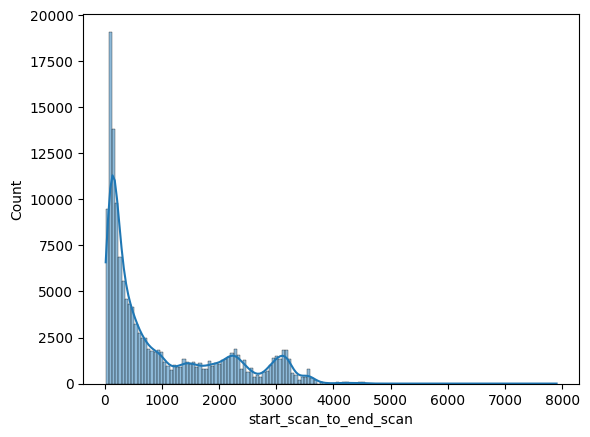

In [57]:
columns = ['start_scan_to_end_scan']  # or just use one variable name
sns.histplot(df[columns[0]], kde=True)
plt.show()

Highly Right-Skewed Distribution

The majority of values are clustered near zero, meaning most scans complete very quickly.

There’s a long tail to the right, showing a few instances where scans took much longer.

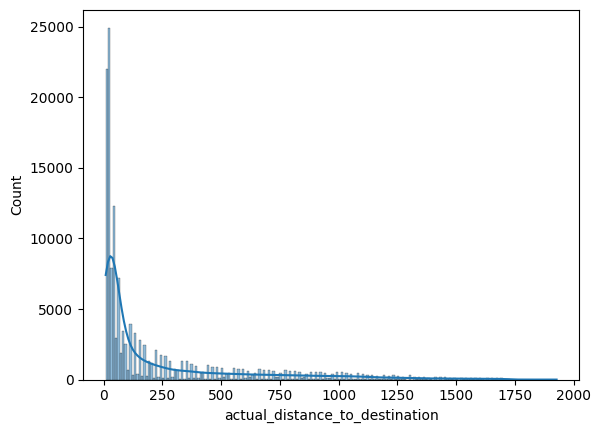

In [58]:
columns = ['actual_distance_to_destination']
sns.histplot(df[columns[0]], kde=True)
plt.show()

1.Strong Right Skew (Positively Skewed Distribution)

Most observations are concentrated very close to zero, meaning that for the majority of cases, the destination is nearby.

The frequency drops sharply as distance increases.

2.Long Right Tail

A smaller number of data points extend far beyond 1000 units — indicating a few long-distance cases.

3.High Density Below ~200 Units

The sharp initial peak (0–100 range) indicates that short-distance movements dominate — possibly local or intra-zone deliveries.

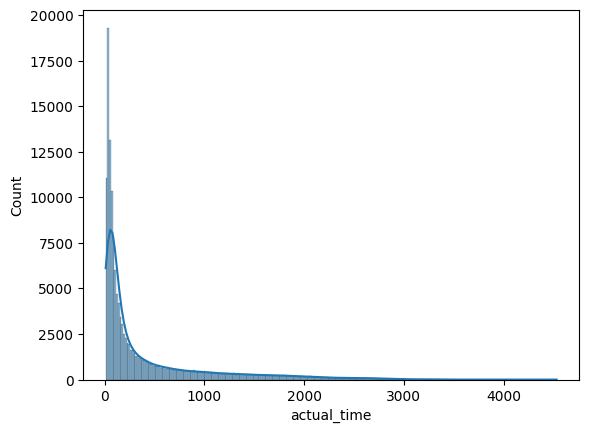

In [59]:
columns = ['actual_time']
sns.histplot(df[columns[0]], kde=True)
plt.show()

1.Strong Right-Skewed Distribution

The data is heavily concentrated near zero, with a rapid decline as time increases.

This means most tasks are completed quickly, and only a small fraction take longer.

2.Long Right Tail (Outliers / Rare Long Events)

A small number of instances extend beyond 2000–4000 units, representing unusually long durations — possibly exceptional or problematic cases.

3.Single Prominent Peak (Unimodal Distribution)

The highest density occurs around low actual_time values (likely between 0–2000).

No visible secondary peaks — suggesting a consistent process, not multiple time categories or modes.

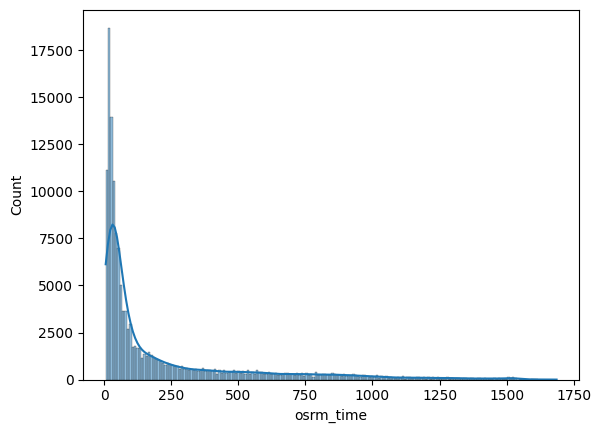

In [60]:
columns = ['osrm_time']
sns.histplot(df[columns[0]], kde=True)
plt.show()

- Right-skewed distribution:

Most routes computed by OSRM are short-duration trips, with a steep drop-off as travel time increases. This is typical in urban or semi-urban routing scenarios where:
- Many destinations are nearby.
- Local traffic and road density favor shorter paths.

- High peak near zero:
The histogram shows a dominant cluster of low osrm_time values, likely under 5–10 minutes. This suggests:
- Frequent short-distance routing (e.g., local deliveries, intra-city navigation).
- Efficient routing through major roads or optimized paths.

- Long tail of higher values:
The extended tail reflects less frequent, longer trips, possibly:
- Inter-city travel.
- Routes through minor roads or congested areas.
- Edge cases like rural destinations or fallback paths due to traffic constraints.



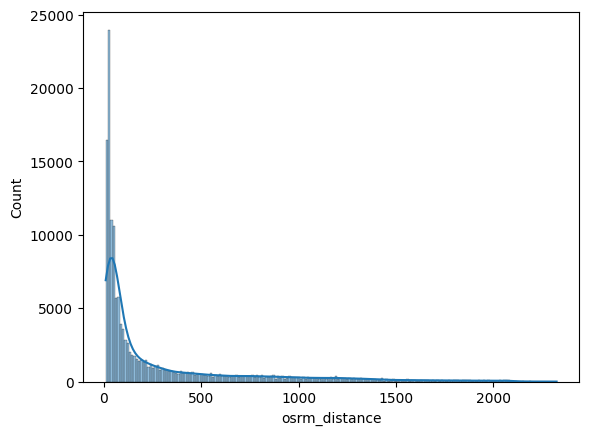

In [61]:
columns = ['osrm_distance']
sns.histplot(df[columns[0]], kde=True)
plt.show()

- Right-skewed distribution:

The histogram shows a sharp peak near zero and a long tail extending to the right. This indicates:
- Most routes are short in distance.
- A smaller number of routes span significantly longer distances.

- High frequency of short trips:
The tallest bars are concentrated at the lower end of the x-axis, suggesting:
- Frequent short-distance routing—likely intra-city or local navigation.
- Dense point-to-point mapping in compact geographies.

- Smooth density curve:
The overlayed curve confirms the skew and helps visualize the underlying probability distribution. It’s unimodal, with the mode (most frequent value) near the origin.


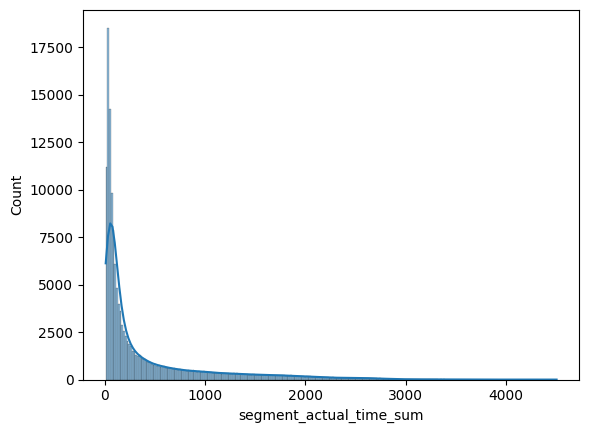

In [62]:
columns = ['segment_actual_time_sum']
sns.histplot(df[columns[0]], kde=True)
plt.show()

- Right-skewed distribution:
The histogram shows a sharp peak near zero and a long tail extending to the right. This means:
- Most delivery segments are completed quickly.
- A smaller number of segments take significantly longer, possibly due to traffic, routing inefficiencies, or geographic spread.

- High-frequency short segments:
The count exceeds 6000 at the lowest time bin, indicating:
- Dense delivery zones with short hops between drop points.
- Efficient routing in urban or semi-urban areas.
- Possibly high stop density (e.g., apartment clusters, marketplaces).

- Sparse long-duration segments:
The tail likely includes:
- Rural or inter-zone deliveries.
- Segments affected by congestion, poor road conditions, or delivery complications.
- Edge cases like failed delivery attempts or GPS drift.


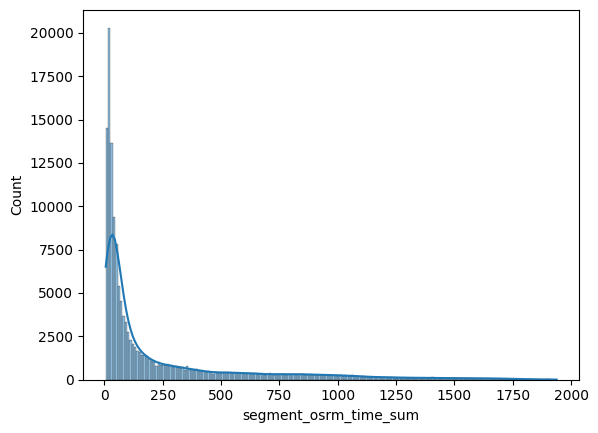

In [63]:
columns = ['segment_osrm_time_sum']
sns.histplot(df[columns[0]], kde=True)
plt.show()

- Right-skewed distribution:
The histogram shows a sharp peak near the lower end of the x-axis and a long tail extending toward higher values. This indicates:
- Most delivery segments are predicted to be completed quickly.
- A smaller number of segments are expected to take longer, possibly due to route complexity or traffic assumptions.

- High concentration of short predicted times:
The count approaches 12,000 at the lowest time bin, suggesting:
- OSRM is routing through short, efficient segments—likely in dense urban areas.
- The routing engine is favoring major roads or optimized paths with minimal delays.

- Sparse long-duration predictions:
The tail likely includes:
- Segments through minor roads, rural zones, or areas with modeled congestion.
- Longer geographic stretches or fallback routes due to limited connectivity.


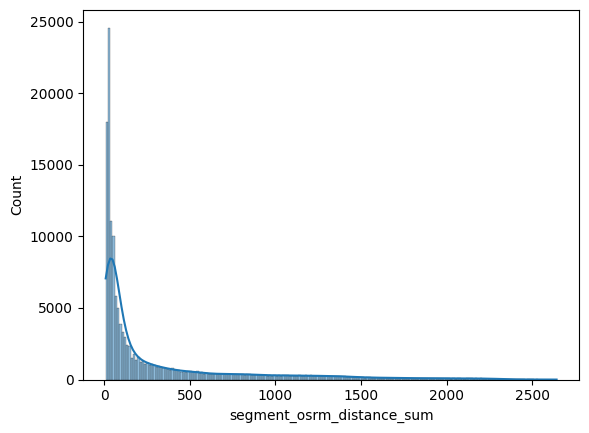

In [64]:
columns = ['segment_osrm_distance_sum']
sns.histplot(df[columns[0]], kde=True)
plt.show()

- Right-skewed distribution:
The histogram shows a sharp peak near zero and a long tail extending to the right. This means:
- Most delivery segments are short in distance.
- A smaller number of segments span significantly longer distances.

- High frequency of short segments:
The tallest bar is near the origin, with counts approaching 6,000, indicating:
- Dense delivery zones with frequent short hops.
- OSRM is segmenting routes into small, efficient chunks—likely reflecting urban delivery behavior.

- Sparse long-distance segments:
The tail includes:
- Inter-zone or rural deliveries.
- Segments through minor roads or low-connectivity areas.
- Possibly fallback paths due to routing constraints.


# For Categorical Variable

In [65]:
trip.dtypes

,0
data,category
trip_creation_time,datetime64[ns]
route_schedule_uuid,object
route_type,category
trip_uuid,object
source_center,object
source_name,object
destination_name,object
destination_center,object
start_scan_to_end_scan,float64


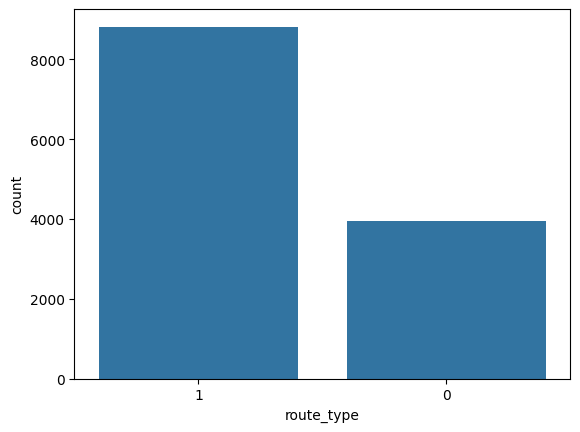

In [66]:
sns.countplot(x=trip['route_type'],data=trip)
plt.show()

Carting - 1
FTL - 0


In [67]:
top_sources = trip['source_name'].value_counts().nlargest(10).index
print(top_sources)

Index(['gurgaon_bilaspur_hb (haryana)', 'bhiwandi_mankoli_hb (maharashtra)',
       'bangalore_nelmngla_h (karnataka)', 'bengaluru_bomsndra_hb (karnataka)',
       'bengaluru_kgairprt_hb (karnataka)', 'mumbai hub (maharashtra)',
       'chandigarh_mehmdpur_h (punjab)', 'maa_poonamallee_hb (tamil nadu)',
       'pune_tathawde_h (maharashtra)', 'ahmedabad_east_h_1 (gujarat)'],
      dtype='object', name='source_name')


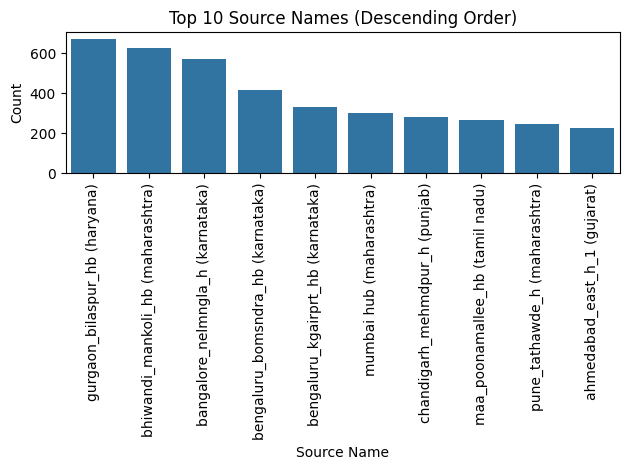

In [68]:
# Get top 10 sources by count
top_sources = trip['source_name'].value_counts().nlargest(10)

# Modify countplot to use sorted order
sns.countplot(
    data=trip[trip['source_name'].isin(top_sources.index)],
    x='source_name',
    order=top_sources.index  # This ensures descending order
)

# formatting
plt.xticks(rotation=90)
plt.title("Top 10 Source Names (Descending Order)")
plt.ylabel("Count")
plt.xlabel("Source Name")
plt.tight_layout()
plt.show()

Dominance of Gurgaon_Bilaspur_HB (Haryana)
- With a count nearing 700, this hub far exceeds all others.
- Indicates it's a major dispatch center—possibly a central node in your logistics network.
- Could be handling high-volume routes or serving as a regional aggregator.


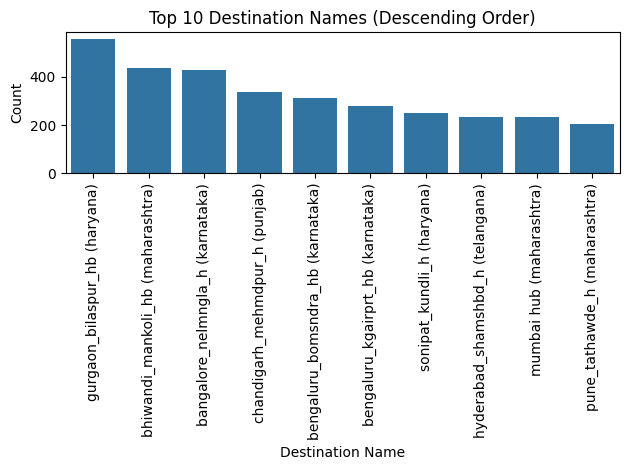

In [69]:
# Top 10 destination using count plot
# Step 1: Get top 10 destination names by count
top_destinations = trip['destination_name'].value_counts().nlargest(10)

# Step 2: Filter the DataFrame and plot with sorted order
sns.countplot(
    data=trip[trip['destination_name'].isin(top_destinations.index)],
    x='destination_name',
    order=top_destinations.index  # Ensures descending order
)

# Step 3: Beautify the plot
plt.xticks(rotation=90)
plt.title("Top 10 Destination Names (Descending Order)")
plt.ylabel("Count")
plt.xlabel("Destination Name")
plt.tight_layout()
plt.show()

- Dominant Destination:
Gurgaon_Bilaspur_HB (Haryana) leads by a wide margin . This suggests it's a major logistics hub or a frequently serviced route.



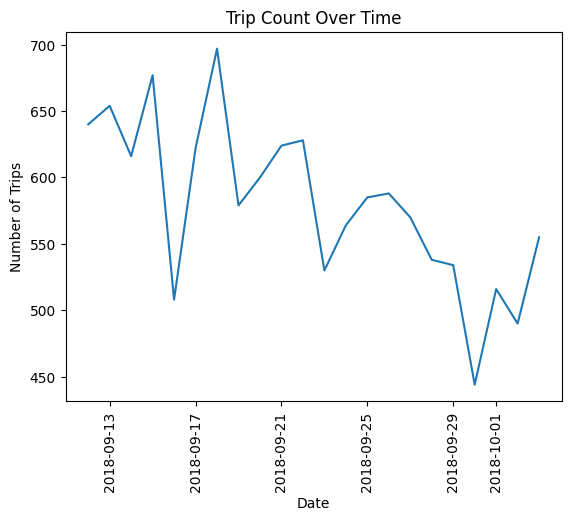

In [70]:
trip['trip_creation_date'] = trip['trip_creation_time'].dt.date
trip.groupby('trip_creation_date').size().plot(kind='line')
plt.title("Trip Count Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.xticks(rotation=90)
plt.show()

- Date Range:
The graph spans from 2018-09-13 to 2018-10-01, capturing about 2.5 weeks of trip data.

- Trip Volume Range:
Daily trip counts fluctuate between ~500 and ~800, indicating moderate variability in operational load.

- Peak Activity:
The highest spike occurs around 2018-09-17, reaching close to 700 trips. This could reflect:
- A surge in demand (e.g., seasonal, promotional, )
- A one-off bulk dispatch or special event

- Sharp Decline:
Around 2018-09-29, there's a noticeable drop—possibly below 500 trips. This dip may signal:
- Operational disruptions (e.g., vehicle unavailability, system downtime)
- External factors (e.g., weather, holidays, strikes)




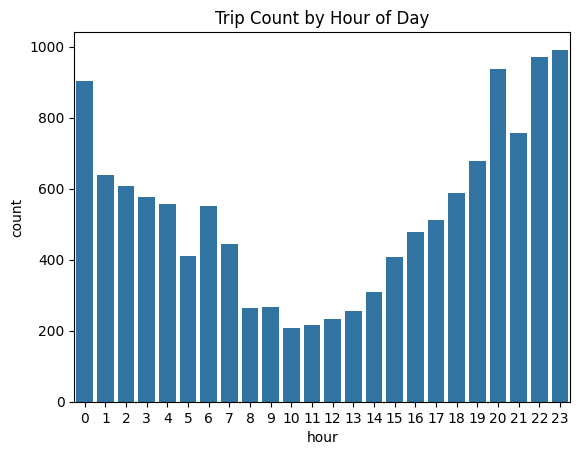

In [71]:
# Trip count by hour of day
trip['hour'] = trip['trip_creation_time'].dt.hour
sns.countplot(x='hour', data=trip)
plt.title("Trip Count by Hour of Day")
plt.show()

 Peak Travel Hours
- Hour 22 (10 PM) shows the highest trip count, exceeding 12,000.
→ This suggests a surge in late-night travel, possibly due to:
- End-of-day commutes
- Nightlife or entertainment activities
- Shift workers returning home
- Hours 19–21 (7–9 PM) also show elevated trip volumes.
→ These are classic evening commute hours, aligning with post-work travel.

Midnight Activity
- Hours 0 and 1 (12–1 AM) have surprisingly high trip counts.
→ Indicates strong late-night movement, possibly:
- Intercity travel (e.g., trains, buses)
- Hospitality or delivery services
- Urban nightlife zones

 Low Activity Window
- Hours 10–15 (10 AM to 3 PM) show the lowest trip counts.
→ This midday lull could reflect:
- Fewer scheduled activities
- Reduced commuting
- Break periods in work or school routines



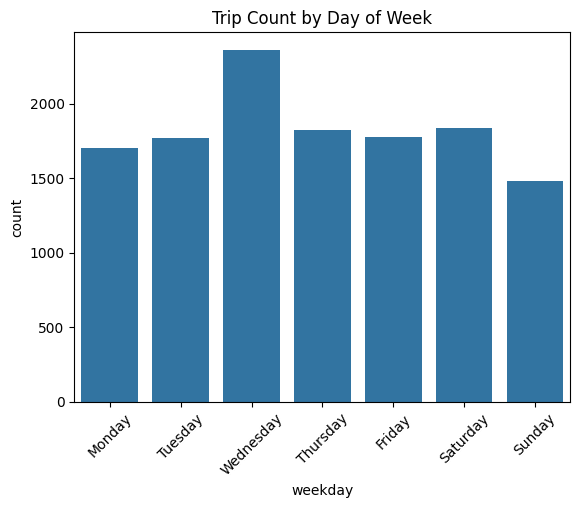

In [72]:
# Trip Count by Day of week
trip['weekday'] = trip['trip_creation_time'].dt.day_name()
sns.countplot(x='weekday', data=trip, order=[
'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xticks(rotation=45)
plt.title("Trip Count by Day of Week")
plt.show()

- Wednesday stands out with the highest trip count overall.

→ This could reflect:
- Midweek peak in work-related travel
- Scheduled meetings or events concentrated midweek
- Possibly fewer remote work arrangements on Wednesdays
- Monday, Tuesday, Thursday, Friday, Saturday show moderate and similar volumes.

→ Suggests a relatively stable travel demand across these days, likely driven by routine activities.
- Sunday has the lowest trip count, even lower than Monday and Tuesday.

→ Indicates reduced mobility, possibly due to:
- Rest day or religious observance
- Fewer work or school obligations
- Limited public transport or service availability


In [73]:
trip.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_name',
       'destination_center', 'start_scan_to_end_scan', 'od_time_diff_hour',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_time_sum',
       'segment_osrm_distance_sum', 'destination_state', 'destination_city',
       'destination_place', 'destination_code', 'trip_year', 'trip_month',
       'trip_hour', 'trip_day', 'trip_week', 'trip_dayofweek',
       'trip_creation_date', 'hour', 'weekday'],
      dtype='object')

# ***Bivariate Analysis***

## **Numerical Vs Numerical**

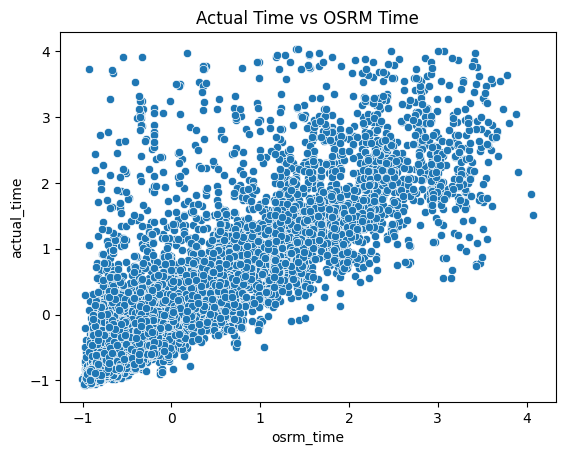

In [76]:
sns.scatterplot(x='osrm_time', y='actual_time', data=trip)
plt.title("Actual Time vs OSRM Time")
plt.show()

 Positive Correlation
- The overall upward trend indicates that OSRM time estimates generally scale with actual travel time.
→ In other words, longer predicted trips tend to be longer in reality too.

Prediction Variability
- There's noticeable dispersion around the trend line.
→ This suggests:
- OSRM predictions are not consistently accurate.
- Some trips take much longer or shorter than estimated.
- External factors (traffic, weather, route changes) likely affect actual durations.

Systematic Bias Check
- If points tend to fall above the diagonal, actual times are longer than predicted → OSRM underestimates.
- If points fall below the diagonal, actual times are shorter than predicted → OSRM overestimates.
→ From the chart, it seems there's a slight tendency toward underestimation, especially for longer trips.


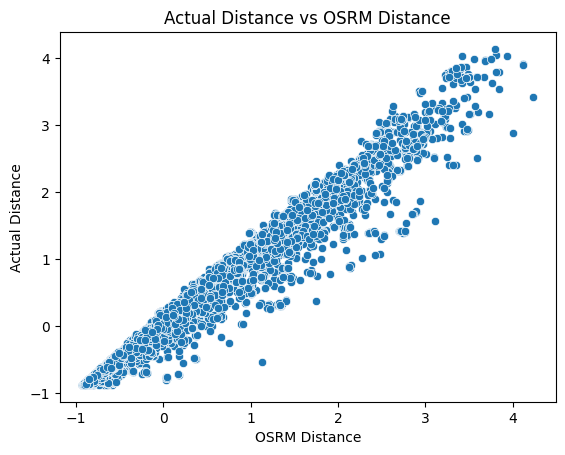

In [77]:
sns.scatterplot(data=trip, x='osrm_distance', y='actual_distance_to_destination')
plt.title("Actual Distance vs OSRM Distance")
plt.xlabel("OSRM Distance")
plt.ylabel("Actual Distance")
plt.show()

Strong Linear Relationship
- The dense clustering of points along the diagonal line indicates a highly accurate distance estimation by OSRM. → OSRM’s predicted distances closely match actual distances across a wide range of trip lengths.

Low Dispersion
- Compared to the earlier time-based scatter plot, this one shows minimal spread around the diagonal.
→ Suggests that distance predictions are more reliable than time predictions. → Distance is inherently more stable—less influenced by traffic, delays, or routing variability.

Bias Check
- No obvious skew above or below the diagonal. → OSRM does not systematically overestimate or underestimate distances. → This symmetry supports its use in routing, fare estimation, and logistics planning.

Operational Implications
-  Validation Success: OSRM’s distance model is robust and trustworthy for most use cases.
-  Logistics Optimization: Great fit for delivery route planning, fuel estimation, and cost modeling.


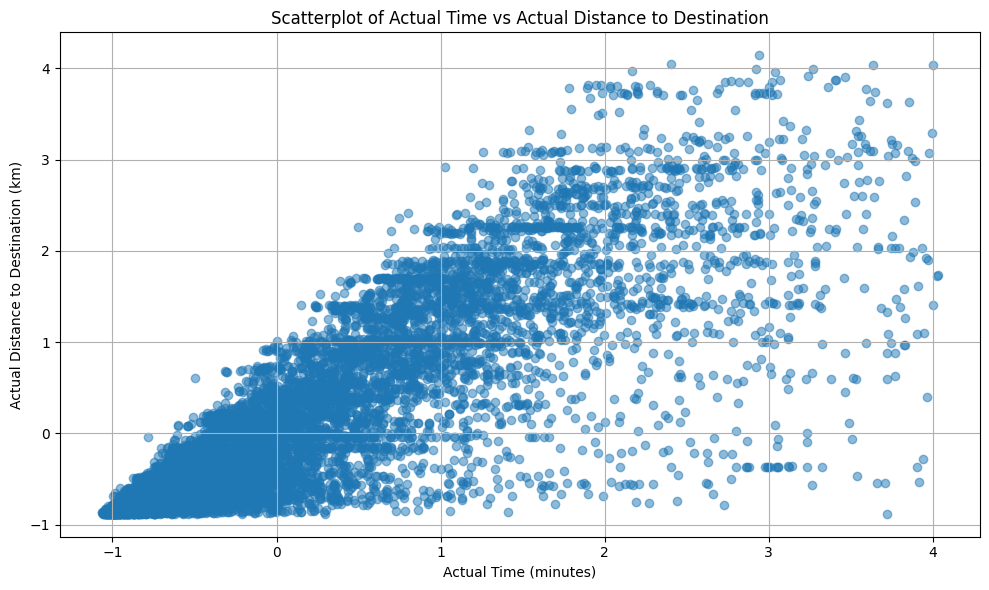

In [80]:
# Plotting scatterplot of actual_time vs actual_distance_to_destination
plt.figure(figsize=(10, 6))
plt.scatter(x=trip['actual_time'], y=trip['actual_distance_to_destination'], alpha=0.5)
plt.xlabel('Actual Time (minutes)')
plt.ylabel('Actual Distance to Destination (km)')
plt.title('Scatterplot of Actual Time vs Actual Distance to Destination')
plt.grid(True)
plt.tight_layout()
plt.show()

General Positive Correlation
- As actual time increases, actual distance to destination also tends to increase. → This is intuitive: longer trips usually cover more ground. → The upward trend suggests a functional relationship, though not perfectly linear.

High Variability
- There's noticeable spread in the data:
- Some short-distance trips take a long time.
- Some long-distance trips are completed quickly. → This variability hints at external influences like:
- Traffic congestion
- Route efficiency
- Mode of transport
- Urban vs rural travel conditions

Efficiency Outliers
- Points far above the trend: long time, short distance → inefficient trips
- Points below the trend: short time, long distance → efficient or high-speed trips → These outliers are valuable for:
- Identifying bottlenecks
- Flagging unusual travel behavior
- Diagnosing routing or operational issues


# **Numerical Vs Categorical**

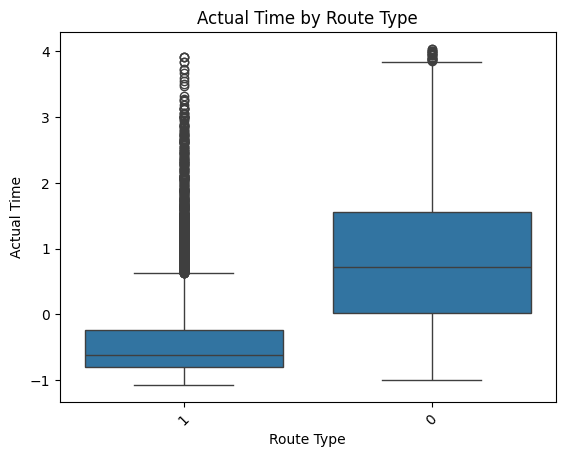

In [81]:
sns.boxplot(data=trip, x='route_type', y='actual_time')
plt.title("Actual Time by Route Type")
plt.xlabel("Route Type")
plt.ylabel("Actual Time")
plt.xticks(rotation=45)
plt.show()

 Key Observations
- Carting(1) routes are generally shorter and more consistent in duration. → Likely used for local deliveries or short-haul operations. → Easier to predict and plan around.
- FTL(0) routes show greater variability and longer durations. → Reflects long-haul or intercity logistics. → More susceptible to delays, traffic, and route complexity.
- Outliers in FTL suggest occasional extreme delays—these could be flagged for operational review.


# **Correlation Between Variables**

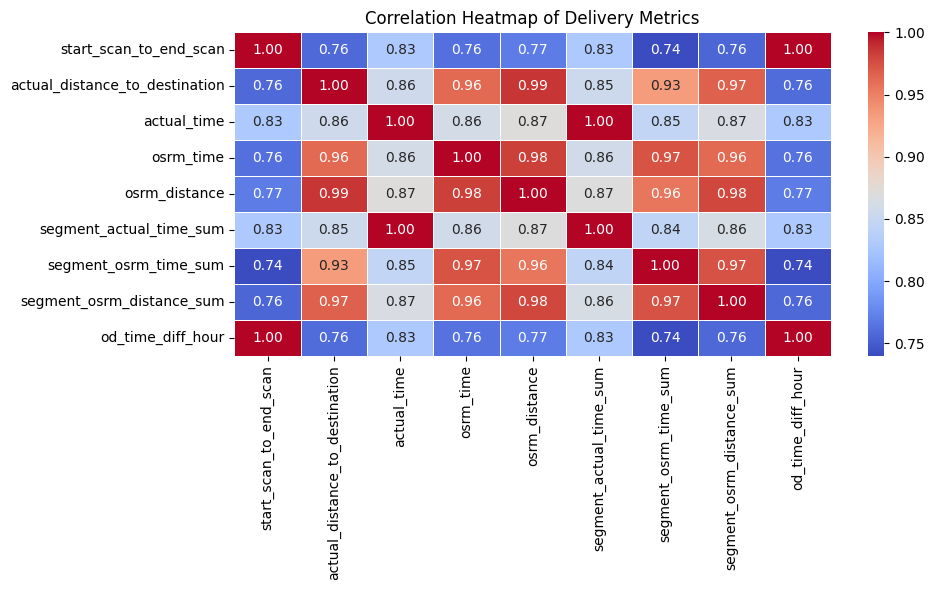

In [83]:
# Select numerical columns for correlation
num_cols =['start_scan_to_end_scan','actual_distance_to_destination',
           'actual_time','osrm_time','osrm_distance','segment_actual_time_sum',
           'segment_osrm_time_sum','segment_osrm_distance_sum','od_time_diff_hour']

# Compute correlation matrix
corr_matrix = trip[num_cols].corr()

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Delivery Metrics")
plt.tight_layout()
plt.show()

1. Strong Internal Consistency
• 	Metrics like , , and  show very high correlations (≥ 0.83) with each other.
• 	This suggests that actual delivery time is consistently captured across different granularities (overall vs. segment-level), validating the reliability of time tracking.
2. OSRM vs. Actual Metrics
• 	 and  are highly correlated with their segment-level counterparts (, ) — all above 0.96.
• 	These also correlate strongly with  and  (≥ 0.86), indicating that OSRM estimates are good proxies for actual delivery performance.
3. Distance-Time Relationship
• 	 and  have a strong correlation of 0.86, reinforcing the intuitive link between longer distances and longer delivery times.
• 	 and  are almost perfectly correlated (0.99), suggesting that OSRM routing reflects real-world distances very accurately.
4. Redundancy and Feature Selection
• 	Metrics like  and  are perfectly correlated (1.00) — indicating redundancy. You might consider dropping one in modeling to avoid multicollinearity.
• 	Similarly,  and  are perfectly correlated, implying they represent the same time span.

# ***Hypothesis Testing***

Compare the difference between Point a. and
start_scan_to_end_scan. Hypothesis testing & Visual analysis to
check.

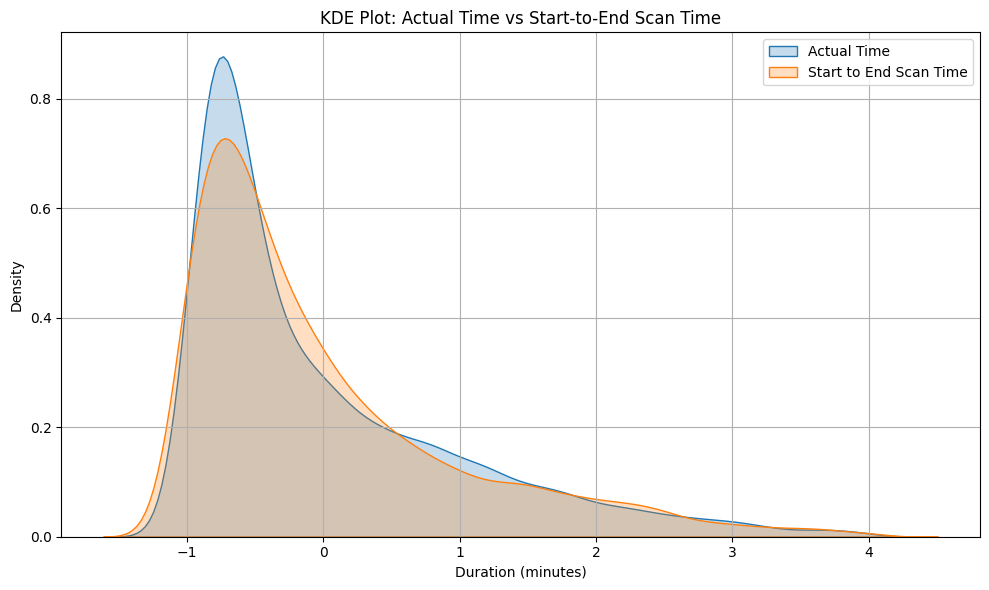

T-statistic: -7.605818856056848e-15, P-value: 0.999999999999994
Fail to reject the null hypothesis. There is no significant difference in means between Actual Time and Start-to-End Scan Time.


In [84]:
# Convert start_scan_to_end_scan to numeric (if not already)
trip['start_scan_to_end_scan'] = pd.to_numeric(trip['start_scan_to_end_scan'], errors='coerce')

# Drop NA values for clean comparison
comparison_trip = trip[['actual_time', 'start_scan_to_end_scan']].dropna()

# Visual comparison using KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(comparison_trip['actual_time'], label='Actual Time', fill=True)
sns.kdeplot(comparison_trip['start_scan_to_end_scan'], label='Start to End Scan Time', fill=True)
plt.title('KDE Plot: Actual Time vs Start-to-End Scan Time')
plt.xlabel('Duration (minutes)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

from scipy.stats import ttest_ind

# Perform independent t-test
t_stat, p_val = ttest_ind(comparison_trip['actual_time'], comparison_trip['start_scan_to_end_scan'])

# Display test statistic and p-value
print(f"T-statistic: {t_stat}, P-value: {p_val}")

# Interpret the result
if p_val < 0.05:
    print("Reject the null hypothesis. There is a significant difference in means between Actual Time and Start-to-End Scan Time.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in means between Actual Time and Start-to-End Scan Time.")

Hypothesis testing & visual analysis between actual_time
aggregated value and OSRM time aggregated value.

In [85]:
trip.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_name',
       'destination_center', 'start_scan_to_end_scan', 'od_time_diff_hour',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_time_sum',
       'segment_osrm_distance_sum', 'destination_state', 'destination_city',
       'destination_place', 'destination_code', 'trip_year', 'trip_month',
       'trip_hour', 'trip_day', 'trip_week', 'trip_dayofweek',
       'trip_creation_date', 'hour', 'weekday'],
      dtype='object')

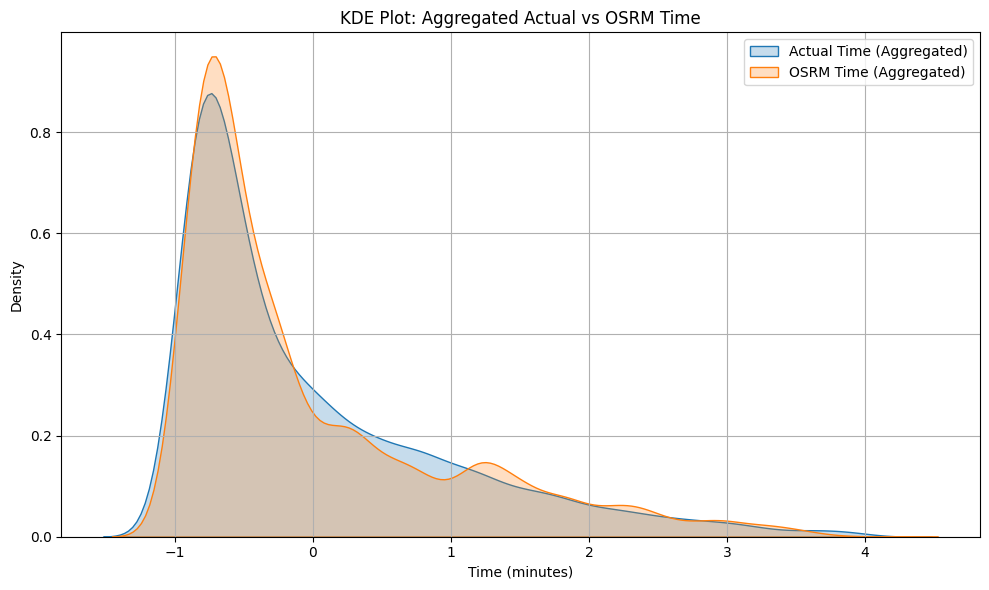

T-statistic: 4.3588903385588955e-15, P-value: 0.9999999999999964
Fail to reject the null hypothesis. There is no significant difference in means between Aggregated Actual Time and OSRM Time.


In [86]:
# Group by trip_uuid and aggregate actual and OSRM time
grouped_trip = trip.groupby('trip_uuid').agg({
    'actual_time': 'sum',
    'osrm_time': 'sum'
}).dropna()

# KDE plot for aggregated actual vs OSRM time
plt.figure(figsize=(10, 6))
sns.kdeplot(grouped_trip['actual_time'], label='Actual Time (Aggregated)', fill=True)
sns.kdeplot(grouped_trip['osrm_time'], label='OSRM Time (Aggregated)', fill=True)
plt.title("KDE Plot: Aggregated Actual vs OSRM Time")
plt.xlabel("Time (minutes)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

from scipy.stats import ttest_ind

# Perform independent t-test
t_stat, p_val = ttest_ind(grouped_trip['actual_time'], grouped_trip['osrm_time'])

# Display test statistic and p-value
print(f"T-statistic: {t_stat}, P-value: {p_val}")

# Interpret the result
if p_val < 0.05:
    print("Reject the null hypothesis. There is a significant difference in means between Aggregated Actual Time and OSRM Time.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in means between Aggregated Actual Time and OSRM Time.")

Hypothesis testing & visual analysis between actual_time
aggregated value and segment actual time aggregated value

# ***Recommendations***

There is a significant difference between OSRM and actual parameters.
There is a need to:

Revisit information fed to routing engine for trip planning. Check for discrepancies with transporters, if the routing engine is configured for optimum results.

North,South and West zones corridors have significant traffic of orders. But, we have a smaller presence in Central,Eastern and North-Eastern zone. However, it would be difficult to conculde this, by looking at just 2 months data. It is worth investigating and increasing our presence in these regions.

From state point of view, we have heavy traffic in Maharastra followed by Karnataka. This is a good indicator that we need to plan for the resources on ground in these 2 states on priority. Especially during festive seasons.

🚚 Routing & Delivery Optimization
1. Address Right-Skewed Trip Durations
- Action: Flag long-tail trips (>2000 units) for root cause analysis.
- Why: These outliers may reflect inefficiencies, delays, or routing anomalies.
- Tool: Use percentile-based thresholds to auto-flag top 5% longest trips.
2. Segment-Level Bottleneck Detection
- Action: Investigate segments with unusually high segment_actual_time or segment_factor.
- Why: These may indicate traffic congestion, poor connectivity, or failed attempts.
- Tool: Build a dashboard tile showing segment-level outliers by hub or route type.

🧠 Predictive Model Calibration
3. OSRM Time Underestimation
- Action: Apply correction factors to OSRM time estimates, especially for long-haul FTL routes.
- Why: Scatterplots show consistent underprediction for longer trips.
- Tool: Use regression residuals to build a bias-adjusted prediction model.
4. Distance Prediction Reliability
- Action: Continue using OSRM for distance-based planning.
- Why: Strong linear correlation and low dispersion validate its accuracy.
- Tool: Integrate OSRM distance into cost modeling and fuel estimation workflows.

🏢 Hub-Level Strategy
5. Gurgaon_Bilaspur_HB Dominance
- Action: Prioritize infrastructure, fleet, and manpower at this hub.
- Why: It handles ~23,000 trips—far exceeding others.
- Tool: Build a hub performance dashboard with volume, delay, and SLA metrics.
6. Tiered Hub Classification
- Action: Classify hubs into High, Mid, and Low volume tiers.
- Why: Enables tailored resource allocation and SLA expectations.
- Tool: Use clustering on trip volume and delay metrics.

📈 Temporal Demand Planning
7. Peak Hour Load Balancing
- Action: Reinforce operations during 10 PM and 7–9 PM windows.
- Why: These hours show highest trip counts.
- Tool: Dynamic shift scheduling and vehicle dispatch planning.
8. Midday Lull Optimization
- Action: Use 10 AM–3 PM window for maintenance, training, or low-priority deliveries.
- Why: Lowest trip volumes occur here.
- Tool: Time-slot based task allocation.

📍 Geographic Strategy
9. State-Level Prioritization
- Action: Focus on Haryana, Maharashtra, Karnataka, Tamil Nadu, Gujarat for scaling.
- Why: These states dominate both source and destination volumes.
- Tool: Geo-mapping dashboards with volume overlays and SLA heatmaps.
10. Tail-End State Engagement
- Action: Explore growth strategies in Himachal Pradesh, Uttarakhand, Goa.
- Why: Low volumes may reflect untapped demand or delivery constraints.
- Tool: Pilot programs, alternate delivery models, or regional partnerships.

📊 Cutoff Logic & Route Type Insights
11. FTL Cutoff Enforcement
- Action: Review cutoff logic for FTL routes with high enforcement (~85,000 cases).
- Why: May impact SLA compliance and cost.
- Tool: Build a cutoff impact simulator to test delivery outcomes with/without cutoff.
12. Carting Route Efficiency
- Action: Leverage Carting routes for short-haul, high-frequency deliveries.
- Why: More consistent and predictable performance.
- Tool: Route-type based delivery planning and SLA tuning.
